In [5]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import pandas as pd
from tqdm import tqdm
import abcd.data.VARS as VARS
from abcd.local.paths import core_path, output_path
from abcd.data.read_data import get_subjects_events_sf, add_event_vars
from abcd.plotting.seaborn.correlations import plot_correlations
from abcd.data.var_tailoring.normalization import normalize_var
from abcd.plotting.seaborn.rendering import save

In [2]:
_, events_df = get_subjects_events_sf()
for var, var_path in VARS.SLEEP_PATHS.items():
    events_df = add_event_vars(events_df, var_path, vars=[var])
    events_df = events_df.dropna()         
    events_df = normalize_var(events_df, var, var)
    

In [3]:
events_df['sleepdisturb1_p'] = 1 - events_df['sleepdisturb1_p'] # Invert sleep disturbance variable

In [4]:
events_df = events_df.rename(columns=VARS.SLEEP)

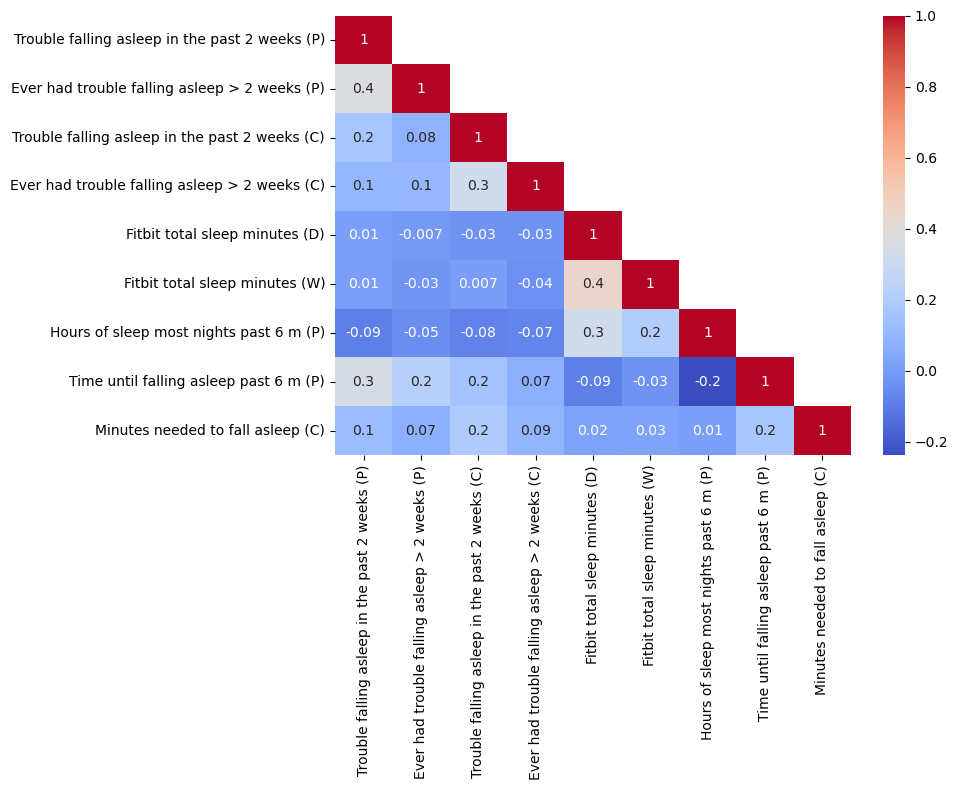

In [5]:
# Plot the correlation between sleep variables
plot = plot_correlations(events_df, columns=list(VARS.SLEEP.values()))
save(plot, path=output_path, file_name="sleep_vars_corr")